In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bar_chart_race as bcr

In [2]:
df_full = pd.read_csv('data/tweets_users_march_21.csv', parse_dates=['date'])
df_user = pd.read_csv('data/user_data.csv')

In [3]:
df_full['year'] = df_full['date'].dt.year
df_full['month'] = df_full['date'].dt.month
df_full['day'] = df_full['date'].dt.day

In [4]:
df_full.shape

(1936, 38)

In [5]:
df_full.head().T

,0,1,2,3,4
url_x,https://twitter.com/BallsyHistory/status/13701...,https://twitter.com/ODParlayHour/status/136949...,https://twitter.com/PodRevDay/status/136927294...,https://twitter.com/PodRevDay/status/136927095...,https://twitter.com/PodRevDay/status/136927029...
date,2021-03-11 21:03:11+00:00,2021-03-10 03:58:40+00:00,2021-03-09 13:04:43+00:00,2021-03-09 12:56:49+00:00,2021-03-09 12:54:11+00:00
content,"Okay, I'm a little addicted to @podchaser and ...",Check out my ⭐️⭐️⭐️⭐️⭐️ review of @Contrarian...,@sparker34621 @Podchaser @jwarnerwallace hi @s...,@AtwoodPodcast @CaseyBroda @CasualBirderPod Ha...,@Heartwarrior24 Happy you're joining us for Po...
renderedContent,"Okay, I'm a little addicted to @podchaser and ...",Check out my ⭐️⭐️⭐️⭐️⭐️ review of @Contrarian...,@sparker34621 @Podchaser @jwarnerwallace hi @s...,@AtwoodPodcast @CaseyBroda @CasualBirderPod Ha...,@Heartwarrior24 Happy you're joining us for Po...
id_x,1370118124511633413,1369497912284217348,1369272941985341446,1369270953369350146,1369270290598006785
user,"{'username': 'BallsyHistory', 'displayname': '...","{'username': 'ODParlayHour', 'displayname': 'O...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'PodRevDay', 'displayname': 'PodR...","{'username': 'PodRevDay', 'displayname': 'PodR..."
outlinks,['https://www.podchaser.com/podcasts/infectiou...,['https://www.podchaser.com/podcasts/the-contr...,[],[],[]
tcooutlinks,['https://t.co/3hMiwEvrV9'],['https://t.co/1Uscnko3TM'],[],[],[]
replyCount,2,0,0,0,0
retweetCount,4,1,0,0,0


In [6]:
df_full.shape

(1936, 38)

In [7]:
df_full = df_full.drop_duplicates()

In [8]:
df_full.shape

(1936, 38)

In [9]:
df_full.username.value_counts()[:10]

stephfuccio       253
PodRevDay         237
musciguy          135
OracleofDusk       94
LizWilcox79        54
Podchaser          48
Infectious_Pod     25
sakeriver          22
ODParlayHour       21
PersuadePod        20
Name: username, dtype: int64

In [10]:
screen = ['PodRevDay', 'stephfuccio']

df_full = df_full[~df_full.username.isin(screen)]

In [11]:
df_full.username.value_counts()[:10]

musciguy          135
OracleofDusk       94
LizWilcox79        54
Podchaser          48
Infectious_Pod     25
sakeriver          22
ODParlayHour       21
PersuadePod        20
DimensionPod       19
garethsounds       18
Name: username, dtype: int64

In [12]:
tweet_table = df_full.groupby('username').size().reset_index(name="tweets")
tweets_total = df_full.shape[0]
unique_users = df_full["username"].nunique()
sum_followers = sum(df_user.followersCount)
unique_countries = df_full.country.nunique()
median_tweet = np.median(tweet_table.tweets)
avg_retweats = np.mean(df_full.retweetCount)
avg_favorite = np.mean(df_full.likeCount)
print(f"{tweets_total}: Tweets using the hashtag #PodRevDay.")
print(f"{unique_users}: People have participated in #PodRevDay.")
print(f"{sum_followers:,d}: Followers of participants in #PodRevDay.")
print(f"{unique_countries}: Minimum number of countries with participants.")
print(f"{avg_favorite:.2f}: Average Number of people liking a tweet about #PodRevDay")
print(f"{avg_retweats:.2f}: Average retweets per tweet about #PodRevDay")
print(f"{median_tweet:.0f}: Median number of tweets per user.")

1446: Tweets using the hashtag #PodRevDay.
422: People have participated in #PodRevDay.
800,293: Followers of participants in #PodRevDay.
19: Minimum number of countries with participants.
6.31: Average Number of people liking a tweet about #PodRevDay
2.42: Average retweets per tweet about #PodRevDay
1: Median number of tweets per user.


In [13]:
#!mkdir plots

In [14]:
df_full.columns

Index(['url_x', 'date', 'content', 'renderedContent', 'id_x', 'user',
       'outlinks', 'tcooutlinks', 'replyCount', 'retweetCount', 'likeCount',
       'quoteCount', 'conversationId', 'lang', 'source', 'sourceUrl',
       'sourceLabel', 'media', 'retweetedTweet', 'quotedTweet',
       'mentionedUsers', 'username', 'id_y', 'displayname', 'location',
       'created', 'followersCount', 'friendsCount', 'url_y', 'verified',
       'geotext', 'city', 'country', 'name', 'iso3', 'year', 'month', 'day'],
      dtype='object')

In [15]:
df_full.head()

,url_x,date,content,renderedContent,id_x,user,outlinks,tcooutlinks,replyCount,retweetCount,...,url_y,verified,geotext,city,country,name,iso3,year,month,day
0,https://twitter.com/BallsyHistory/status/13701...,2021-03-11 21:03:11+00:00,"Okay, I'm a little addicted to @podchaser and ...","Okay, I'm a little addicted to @podchaser and ...",1370118124511633413,"{'username': 'BallsyHistory', 'displayname': '...",['https://www.podchaser.com/podcasts/infectiou...,['https://t.co/3hMiwEvrV9'],2,4,...,https://twitter.com/BallsyHistory,False,<geotext.geotext.GeoText object at 0x7f8b86071...,NaN,NaN,NaN,NaN,2021,3,11
1,https://twitter.com/ODParlayHour/status/136949...,2021-03-10 03:58:40+00:00,Check out my ⭐️⭐️⭐️⭐️⭐️ review of @Contrarian...,Check out my ⭐️⭐️⭐️⭐️⭐️ review of @Contrarian...,1369497912284217348,"{'username': 'ODParlayHour', 'displayname': 'O...",['https://www.podchaser.com/podcasts/the-contr...,['https://t.co/1Uscnko3TM'],0,1,...,https://twitter.com/ODParlayHour,False,<geotext.geotext.GeoText object at 0x7f8b86071...,Binghamton,United States,United States,USA,2021,3,10
5,https://twitter.com/OnceUponAGene/status/13691...,2021-03-09 05:55:52+00:00,Check out my ⭐️⭐️⭐️⭐️⭐️ review of Courageous P...,Check out my ⭐️⭐️⭐️⭐️⭐️ review of Courageous P...,1369165015492612100,"{'username': 'OnceUponAGene', 'displayname': '...",['https://www.podchaser.com/podcasts/courageou...,['https://t.co/xngHeHlSA8'],0,1,...,https://twitter.com/OnceUponAGene,False,<geotext.geotext.GeoText object at 0x7f8b86071...,Seattle,United States,United States,USA,2021,3,9
6,https://twitter.com/OracleofDusk/status/136916...,2021-03-09 05:48:47+00:00,14th and final #PodRevDay Review is for an epi...,14th and final #PodRevDay Review is for an epi...,1369163235807625216,"{'username': 'OracleofDusk', 'displayname': 'M...",['https://www.podchaser.com/podcasts/we-fix-sp...,['https://t.co/UcIYYi3jxy'],0,1,...,https://twitter.com/OracleofDusk,False,<geotext.geotext.GeoText object at 0x7f8b86071...,NaN,NaN,NaN,NaN,2021,3,9
7,https://twitter.com/OracleofDusk/status/136916...,2021-03-09 05:41:22+00:00,13th #PodRevDay is for an episode of @scottish...,13th #PodRevDay is for an episode of @scottish...,1369161368822222849,"{'username': 'OracleofDusk', 'displayname': 'M...",['https://www.podchaser.com/podcasts/a-scottis...,['https://t.co/qoSCa5fJns'],2,2,...,https://twitter.com/OracleofDusk,False,<geotext.geotext.GeoText object at 0x7f8b86071...,NaN,NaN,NaN,NaN,2021,3,9


## Track Growth Over Time

### Tweets By Month

In [16]:
#Create a frequency table of the number of tweets per month
tweets_per_month = df_full[['year', 'month']].value_counts().sort_index()

In [17]:
#Fill in the frequency table so there aren't blank cells
tweets_per_month = pd.DataFrame(tweets_per_month)
tweets_per_month = tweets_per_month.reset_index()
tweets_per_month.columns = ['year', 'month', 'count']

In [18]:
#Add a running total 
tweets_per_month['overall'] = tweets_per_month['count'].cumsum()
tweets_per_month

,year,month,count,overall
0,2020,2,170,170
1,2020,3,69,239
2,2020,4,51,290
3,2020,5,51,341
4,2020,6,93,434
5,2020,7,100,534
6,2020,8,169,703
7,2020,9,89,792
8,2020,10,95,887
9,2020,11,90,977


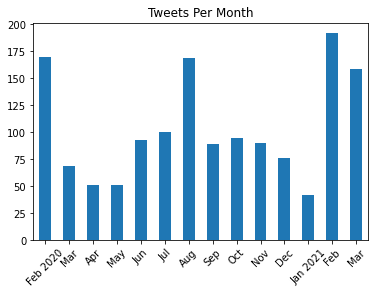

In [19]:
ax = (tweets_per_month.loc[:, ["month", 'count']]
                      .plot
                      .bar(x='month', 
                           title = "Tweets Per Month", 
                           legend=False));

months = ('Feb 2020', "Mar", "Apr", 'May', "Jun", "Jul", 'Aug', "Sep", "Oct", "Nov", "Dec", "Jan 2021", "Feb", "Mar")
positions = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)


plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax.figure.savefig('plots/tweets_per_month.png');

### Tweets By Day

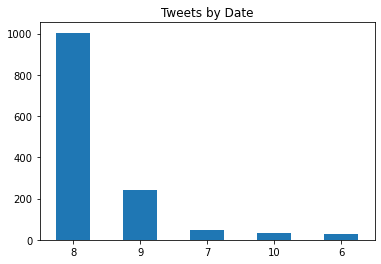

In [20]:
tweets_per_day = df_full.groupby('day').count().sort_values('month', ascending=False).reset_index()
ax2=tweets_per_day.head(5).plot.bar(x='day',
                                y='date',
                                title="Tweets by Date",
                                legend=None)
plt.xticks(rotation='horizontal')
plt.xlabel("");
ax2.figure.savefig('plots/tweets_by_date.png')

### Retweets per Month

In [21]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

In [22]:
retweets_per_month

,year,month,count
0,2020,2,529
1,2020,3,175
2,2020,4,113
3,2020,5,126
4,2020,6,225
5,2020,7,278
6,2020,8,398
7,2020,9,195
8,2020,10,223
9,2020,11,146


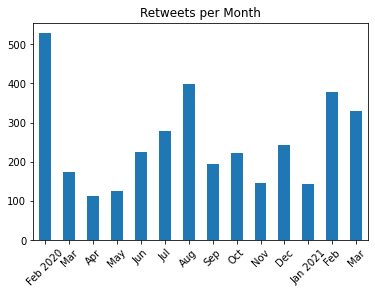

In [23]:
ax3 = (retweets_per_month.loc[:, ['month', 'count']]
                         .plot
                         .bar(x='month',
                              legend=False,
                              title="Retweets per Month"))

plt.xticks(positions, months, rotation=45);
plt.xlabel("");

ax3.figure.savefig('plots/retweets_per_month.png')

## Favorites Per Month

In [24]:
retweets_per_month = df_full.groupby(['year','month'])['retweetCount'].sum().reset_index()
#Fill in the frequency table so there aren't blank cells
retweets_per_month = pd.DataFrame(retweets_per_month)
retweets_per_month.columns = ['year', 'month', 'count']

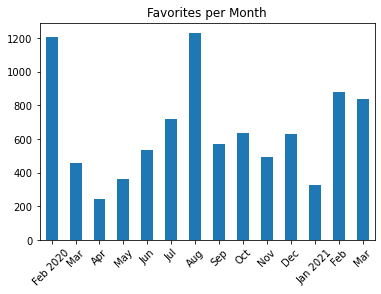

In [25]:
favorites_per_month = df_full.groupby(['year','month'])['likeCount'].sum().sort_index(ascending=True)
ax4 = favorites_per_month.plot.bar(title='Favorites per Month')
plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax4.figure.savefig('plots/favorites_per_month.png')

## Unique Users per Month

In [26]:
uniques_per_month = df_full.groupby([df_full['date'].dt.year.rename('year'), df_full['date'].dt.month.rename('month')])['username'].nunique().rename('count')
uniques_per_month = pd.DataFrame(uniques_per_month).reset_index()
uniques_per_month

,year,month,count
0,2020,2,92
1,2020,3,38
2,2020,4,27
3,2020,5,29
4,2020,6,54
5,2020,7,57
6,2020,8,72
7,2020,9,48
8,2020,10,47
9,2020,11,37


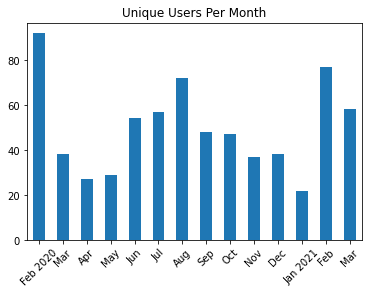

In [27]:
ax5 = (uniques_per_month.loc[:, ["month", 'count']]
                        .plot
                        .bar(x='month', 
                             title = "Unique Users Per Month", 
                             legend=False));

plt.xticks(positions, months, rotation=45);
plt.xlabel("");
ax5.figure.savefig('plots/uniques_per_month.png')

## Participants by Country

In [28]:
table = df_full.groupby(['year','month','country']).size().reset_index(name="counts")
table['total'] = table.groupby(['country'])['counts'].cumsum()
table['country'] = table.country.replace("PolandSerbia", "Poland")

In [29]:
table_wide = table.pivot(index=['year', 'month'], columns=['country'], values=['total']).fillna(method='ffill', axis=0).reset_index()
table_wide.fillna(0, inplace=True)

In [30]:
table_wide.reset_index()

index  year month     total                                      \
country                   Australia Canada Ecuador France Germany India   
0           0  2020     2       5.0    5.0     0.0    0.0     1.0   0.0   
1           1  2020     3       5.0    5.0     1.0    0.0     1.0   0.0   
2           2  2020     4       6.0    5.0     1.0    0.0     1.0   0.0   
3           3  2020     5       6.0    6.0     1.0    0.0     1.0   1.0   
4           4  2020     6       6.0    7.0     1.0    0.0     2.0   2.0   
5           5  2020     7       6.0    9.0     1.0    1.0     4.0   2.0   
6           6  2020     8       6.0   20.0     1.0    1.0     4.0   2.0   
7           7  2020     9       6.0   24.0     1.0    1.0     4.0   2.0   
8           8  2020    10       6.0   24.0     1.0    1.0     4.0   2.0   
9           9  2020    11       6.0   31.0     1.0    1.0     4.0   2.0   
10         10  2020    12       6.0   37.0     1.0    1.0     6.0   2.0   
11         11  2021     1       6.0   38.0     1.0    1.0     6.0   2.0   
12         12  2021     2       6.0   50.0     1.0    1.0     6.0   2.0   
13         13  2021     3       6.0   57.0     1.0    1.0     6.0   3.0   

                 ...                                          \
country Ireland  ... New Zealand Nigeria Poland Spain Sweden   
0           0.0  ...         3.0     0.0    0.0   0.0    0.0   
1           0.0  ...         3.0     0.0    0.0   0.0    0.0   
2           0.0  ...         3.0     0.0    0.0   0.0    0.0   
3           0.0  ...         3.0     0.0    0.0   0.0    0.0   
4           0.0  ...         3.0     3.0    0.0   0.0    0.0   
5           0.0  ...         3.0     4.0    2.0   5.0    0.0   
6           0.0  ...         3.0     4.0    4.0   5.0    2.0   
7           0.0  ...         3.0     4.0    4.0   7.0    2.0   
8           0.0  ...         3.0     4.0    4.0  11.0    2.0   
9           0.0  ...         3.0     4.0    4.0  11.0    2.0   
10          0.0  ...         3.0     4.0    4.0  11.0    2.0   
11          0.0  ...         3.0     4.0    4.0  11.0    2.0   
12          0.0  ...         3.0     4.0    4.0  11.0    2.0   
13          3.0  ...         3.0     4.0    4.0  11.0    2.0   

                                                                           
country United Arab Emirates United Kingdom United States Vanuatu Vietnam  
0                        0.0           13.0          74.0     0.0     1.0  
1                        0.0           20.0         112.0     0.0     1.0  
2                        0.0           24.0         137.0     0.0     1.0  
3                        0.0           32.0         164.0     0.0     1.0  
4                        0.0           46.0         210.0     0.0     1.0  
5                        0.0           56.0         249.0     0.0     1.0  
6                        3.0           59.0         340.0     1.0     1.0  
7                        3.0           63.0         386.0     2.0     1.0  
8                        3.0           71.0         412.0     2.0     1.0  
9                        3.0           91.0         450.0     2.0     1.0  
10                       3.0           97.0         482.0     2.0     1.0  
11                       3.0          105.0         492.0     2.0     1.0  
12                       3.0          112.0         570.0     2.0     1.0  
13                       3.0          120.0         659.0     2.0     1.0  

[14 rows x 22 columns]

In [31]:
original_names = table_wide.columns
_ , country_names = zip(*original_names)
table_wide.columns = country_names

In [32]:
table_wide = pd.concat([table_wide]*2)
table_wide.sort_index(inplace=True)

In [33]:
table_wide.columns

Index(['', '', 'Australia', 'Canada', 'Ecuador', 'France', 'Germany', 'India',
       'Ireland', 'Italy', 'Malaysia', 'New Zealand', 'Nigeria', 'Poland',
       'Spain', 'Sweden', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Vanuatu', 'Vietnam'],
      dtype='object')

In [34]:
table_wide.columns.values[[0, 1]] = ['year', 'month']

In [35]:
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,...,New Zealand,Nigeria,Poland,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
0,2020,2,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
1,2020,3,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
2,2020,4,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
3,2020,5,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
4,2020,6,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,3.0,0.0,0.0,0.0,0.0,46.0,210.0,0.0,1.0
4,2020,6,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,3.0,0.0,0.0,0.0,0.0,46.0,210.0,0.0,1.0


In [36]:
mon_num = list(range(1,13))
mon_names = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

months_dic = dict(zip(mon_num, mon_names))
# df['col1'].replace(di, inplace=True)
table_wide['month'] = table_wide['month'].replace(months_dic)
table_wide

,year,month,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,...,New Zealand,Nigeria,Poland,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
0,2020,February,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
1,2020,March,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
2,2020,April,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
3,2020,May,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,...,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
4,2020,June,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,3.0,0.0,0.0,0.0,0.0,46.0,210.0,0.0,1.0
4,2020,June,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,...,3.0,3.0,0.0,0.0,0.0,0.0,46.0,210.0,0.0,1.0


In [37]:
table_wide['month_year'] = table_wide['month']+" "+table_wide['year'].astype(str)
table_wide = table_wide.drop(columns=['month', 'year'])

In [38]:
table_wide.set_index('month_year')

,Australia,Canada,Ecuador,France,Germany,India,Ireland,Italy,Malaysia,New Zealand,Nigeria,Poland,Spain,Sweden,United Arab Emirates,United Kingdom,United States,Vanuatu,Vietnam
month_year,,,,,,,,,,,,,,,,,,,
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
February 2020,5.0,5.0,0.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,13.0,74.0,0.0,1.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
March 2020,5.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,20.0,112.0,0.0,1.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
April 2020,6.0,5.0,1.0,0.0,1.0,0.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,24.0,137.0,0.0,1.0
May 2020,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
May 2020,6.0,6.0,1.0,0.0,1.0,1.0,0.0,6.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,32.0,164.0,0.0,1.0
June 2020,6.0,7.0,1.0,0.0,2.0,2.0,0.0,6.0,1.0,3.0,3.0,0.0,0.0,0.0,0.0,46.0,210.0,0.0,1.0
